In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('monthly_milk_production.csv', index_col = 'Date', parse_dates = True)
df.index.freq = 'MS'

In [3]:
df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [4]:
df.shape

(168, 1)

In [5]:
df.describe()

,Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [7]:
df.isnull().sum()

Production    0
dtype: int64

In [8]:
df.duplicated().sum()

26

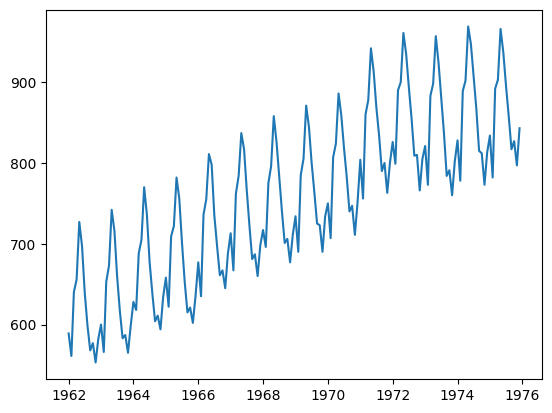

In [9]:
plt.plot(df['Production'])

<Axes: xlabel='Date'>

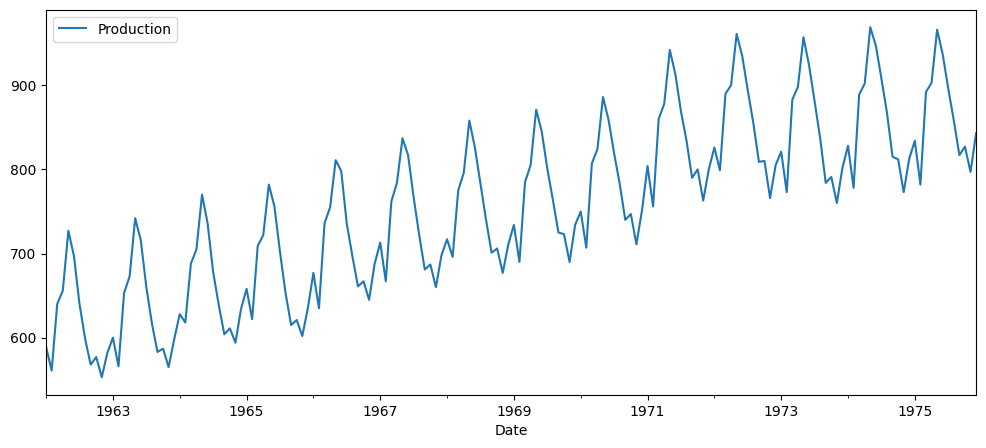

In [10]:
df.plot(figsize = (12,5))

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

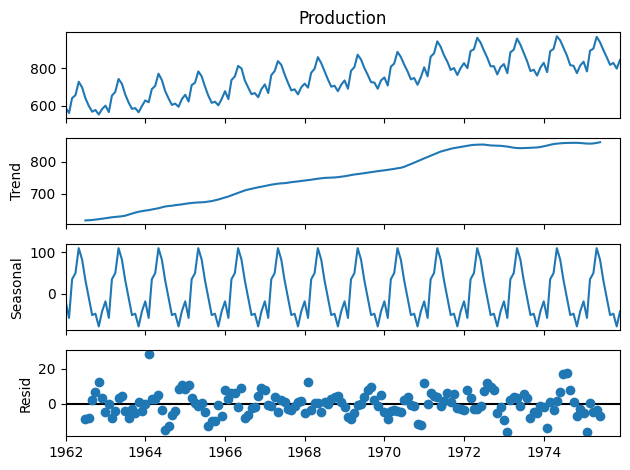

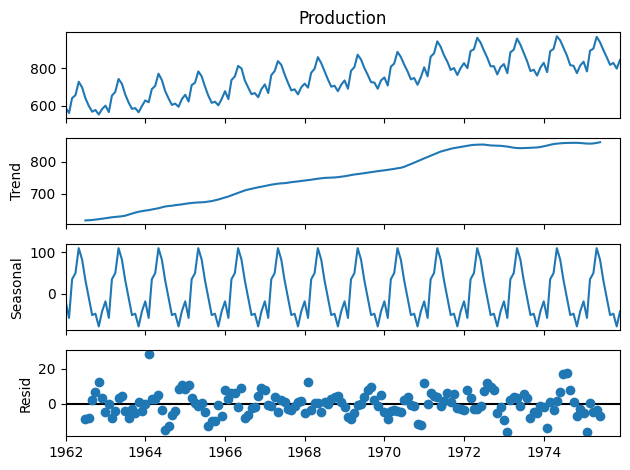

In [12]:
results = seasonal_decompose(df['Production'])
results.plot()

In [13]:
len(df)

168

In [14]:
train = df.iloc[:156]
test = df.iloc[156:]

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [16]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [17]:
scaler.fit(train)

MinMaxScaler()

In [18]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [19]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [21]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length = n_input,batch_size = 1)

In [22]:
print(len(generator))

153


In [25]:
X,y = generator[0]
print(f'Given the array : \n{X.flatten()}')
print(f'Predict this y : \n {y}')

Given the array : 
[0.08653846 0.01923077 0.20913462]
Predict this y : 
 [[0.24759615]]


In [26]:
X.shape

(1, 3, 1)

In [28]:
n_input = 12
generator = TimeseriesGenerator(scaled_train,scaled_train,length = n_input,batch_size = 1)

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [33]:
model = Sequential()
model.add(LSTM(100 ,activation = 'relu' , input_shape = (n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [34]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.fit(generator,epochs = 50)

Epoch 1/50
 45/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1546

C:\Users\2909k\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0853
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0235
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0113
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0100
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0086
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045
Epoch 15/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037


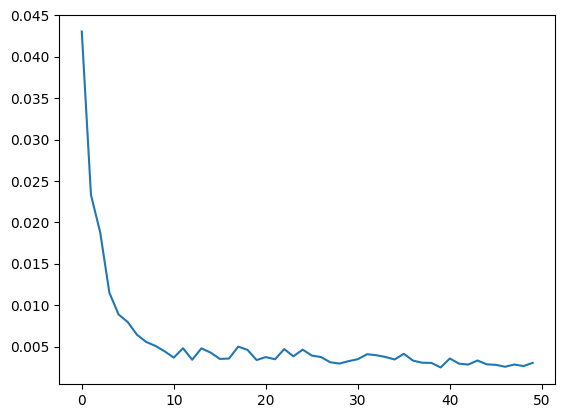

In [36]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [37]:
last_train_batch = scaled_train[-12:]


In [38]:
last_train_batch = last_train_batch.reshape((1,n_input,n_features))

In [39]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


array([[0.602196]], dtype=float32)

In [40]:
scaled_test[0]

array([0.67548077])

In [47]:
test_prediction = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
    curr_pred = model.predict(current_batch)[0]
    test_prediction.append(curr_pred)
    current_batch = np.append(current_batch[:,1:],[[curr_pred]],axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [49]:
test_prediction

[array([0.602196], dtype=float32),
 array([0.60745203], dtype=float32),
 array([0.7671118], dtype=float32),
 array([0.85604936], dtype=float32),
 array([0.96483004], dtype=float32),
 array([0.94790435], dtype=float32),
 array([0.8711313], dtype=float32),
 array([0.75880474], dtype=float32),
 array([0.6519881], dtype=float32),
 array([0.59947664], dtype=float32),
 array([0.56027144], dtype=float32),
 array([0.5726092], dtype=float32)]

In [50]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [52]:
true_predictions = scaler.inverse_transform(test_prediction)

In [54]:
test['Predictions'] = true_predictions

C:\Users\2909k\AppData\Local\Temp\ipykernel_25892\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Date'>

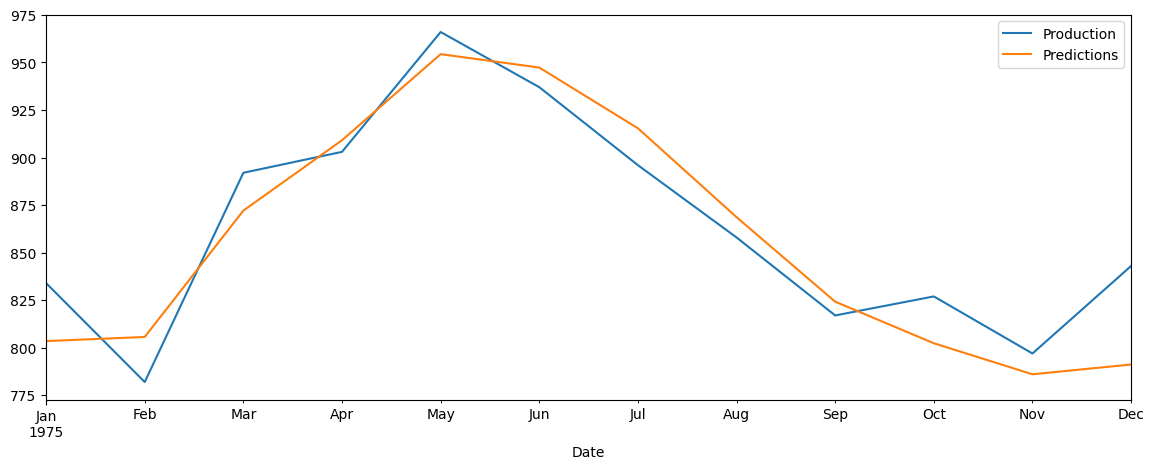

In [55]:
test.plot(figsize = (14,5))

In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

22.57539416206212
